In [34]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 754.3 kB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('./open/train.csv')
test_data = pd.read_csv('./open/test.csv')
snp_data = pd.read_csv('./open/snp_info.csv')

In [3]:
train_data

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A A,G A,A A,G G,A G,G A,A A,A A,A A,B
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G A,G A,A A,A G,A G,A A,A G,A A,G A,C
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A G,A G,G A,G G,C A,G G,A


In [4]:
test_data

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,TEST_170,0,0,0,2,A G,G G,C C,A A,C A,A G,A A,G G,A A,G G,G G,A A,A A,A A,G A
171,TEST_171,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,A G,A A,A A,A G,A A,G A
172,TEST_172,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,G G,A G,A A,A G,A A,G G
173,TEST_173,0,0,0,2,A G,G G,C A,G A,C C,G G,A A,G A,A A,G G,A G,A A,A A,A A,A A


In [5]:
snp_data

,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.05460,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.15670,13897068
2,SNP_03,ARS-BFGL-NGS-117009,6,68.28920,44649549
3,SNP_04,ARS-BFGL-NGS-60567,6,77.87490,53826064
4,SNP_05,BovineHD0600017032,6,80.50150,61779512
5,SNP_06,BovineHD0600017424,6,80.59540,63048481
6,SNP_07,Hapmap49442-BTA-111073,6,80.78000,64037334
7,SNP_08,BovineHD0600018638,6,82.68560,67510588
8,SNP_09,ARS-BFGL-NGS-37727,6,86.87400,73092782
9,SNP_10,BTB-01558306,7,62.06920,40827112


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      262 non-null    object
 1   father  262 non-null    int64 
 2   mother  262 non-null    int64 
 3   gender  262 non-null    int64 
 4   trait   262 non-null    int64 
 5   SNP_01  262 non-null    object
 6   SNP_02  262 non-null    object
 7   SNP_03  262 non-null    object
 8   SNP_04  262 non-null    object
 9   SNP_05  262 non-null    object
 10  SNP_06  262 non-null    object
 11  SNP_07  262 non-null    object
 12  SNP_08  262 non-null    object
 13  SNP_09  262 non-null    object
 14  SNP_10  262 non-null    object
 15  SNP_11  262 non-null    object
 16  SNP_12  262 non-null    object
 17  SNP_13  262 non-null    object
 18  SNP_14  262 non-null    object
 19  SNP_15  262 non-null    object
 20  class   262 non-null    object
dtypes: int64(4), object(17)
memory usage: 43.1+ KB


In [7]:
train_data['mother'].value_counts()

0    262
Name: mother, dtype: int64

In [8]:
train_data['father'].value_counts()

0    262
Name: father, dtype: int64

In [9]:
train_data.columns

Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class'],
      dtype='object')

In [10]:
train_data['gender'].value_counts()

0    262
Name: gender, dtype: int64

In [11]:
# snp는 대상 유전자에 대한 정보가 들어있다

In [12]:
train_data['SNP_01'].value_counts()

G G    141
A G     71
A A     50
Name: SNP_01, dtype: int64

In [13]:
train_data['SNP_02'].value_counts()

G G    108
A G     97
A A     57
Name: SNP_02, dtype: int64

In [14]:
dataset = pd.concat([train_data,test_data])

In [15]:
dataset

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,TEST_170,0,0,0,2,A G,G G,C C,A A,C A,...,A A,G G,A A,G G,G G,A A,A A,A A,G A,NaN
171,TEST_171,0,0,0,2,G G,A A,A A,A A,C A,...,A A,A A,A A,A G,A A,A A,A G,A A,G A,NaN
172,TEST_172,0,0,0,2,G G,A A,A A,A A,C A,...,A A,A A,A A,G G,A G,A A,A G,A A,G G,NaN
173,TEST_173,0,0,0,2,A G,G G,C A,G A,C C,...,A A,G A,A A,G G,A G,A A,A A,A A,A A,NaN


In [16]:
features = ['SNP_01','SNP_02','SNP_03','SNP_04','SNP_05','SNP_06','SNP_07','SNP_08','SNP_09','SNP_10','SNP_11','SNP_12','SNP_13','SNP_14','SNP_15']

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in features:
    
    encoder.fit(dataset[i])
    dataset[i] = encoder.transform(dataset[i])

In [20]:
dataset

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,2,1,0,1,1,...,0,2,0,2,1,0,0,0,0,B
1,TRAIN_001,0,0,0,2,1,1,1,0,0,...,0,1,0,1,0,1,2,0,0,C
2,TRAIN_002,0,0,0,2,2,2,0,1,2,...,0,1,1,1,0,0,0,0,0,B
3,TRAIN_003,0,0,0,1,0,2,0,1,0,...,2,0,2,1,2,2,2,0,2,A
4,TRAIN_004,0,0,0,2,2,2,2,0,2,...,0,0,0,2,0,0,1,0,1,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,TEST_170,0,0,0,2,1,2,2,0,1,...,0,2,0,2,2,0,0,0,1,NaN
171,TEST_171,0,0,0,2,2,0,0,0,1,...,0,0,0,1,0,0,1,0,1,NaN
172,TEST_172,0,0,0,2,2,0,0,0,1,...,0,0,0,2,1,0,1,0,2,NaN
173,TEST_173,0,0,0,2,1,2,1,1,2,...,0,1,0,2,1,0,0,0,0,NaN


In [21]:
train_data = dataset[0 : 262]

In [22]:
train_data

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,2,1,0,1,1,...,0,2,0,2,1,0,0,0,0,B
1,TRAIN_001,0,0,0,2,1,1,1,0,0,...,0,1,0,1,0,1,2,0,0,C
2,TRAIN_002,0,0,0,2,2,2,0,1,2,...,0,1,1,1,0,0,0,0,0,B
3,TRAIN_003,0,0,0,1,0,2,0,1,0,...,2,0,2,1,2,2,2,0,2,A
4,TRAIN_004,0,0,0,2,2,2,2,0,2,...,0,0,0,2,0,0,1,0,1,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,1,1,0,1,2,...,0,1,0,2,1,1,0,0,0,B
258,TRAIN_258,0,0,0,2,2,0,1,0,0,...,1,1,0,1,1,0,1,0,1,C
259,TRAIN_259,0,0,0,1,1,2,0,1,0,...,2,1,1,0,2,2,2,1,2,A
260,TRAIN_260,0,0,0,1,0,2,0,1,0,...,2,0,1,1,1,1,2,1,2,A


In [23]:
test_data = dataset[262:437]

In [24]:
test_data

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TEST_000,0,0,0,1,1,2,0,1,0,...,2,1,1,1,1,1,2,1,1,NaN
1,TEST_001,0,0,0,2,2,1,2,2,2,...,0,0,0,2,1,0,0,0,0,NaN
2,TEST_002,0,0,0,2,2,1,0,0,1,...,0,0,0,1,0,1,2,0,2,NaN
3,TEST_003,0,0,0,2,2,1,1,0,2,...,0,0,0,2,0,1,1,0,0,NaN
4,TEST_004,0,0,0,1,0,2,0,2,0,...,2,0,2,1,2,1,2,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,TEST_170,0,0,0,2,1,2,2,0,1,...,0,2,0,2,2,0,0,0,1,NaN
171,TEST_171,0,0,0,2,2,0,0,0,1,...,0,0,0,1,0,0,1,0,1,NaN
172,TEST_172,0,0,0,2,2,0,0,0,1,...,0,0,0,2,1,0,1,0,2,NaN
173,TEST_173,0,0,0,2,1,2,1,1,2,...,0,1,0,2,1,0,0,0,0,NaN


In [26]:
encoder.fit(train_data['class'])
train_data['class'] = encoder.transform(train_data['class'])

C:\Users\vpdlf910\AppData\Local\Temp\ipykernel_15920\3016390209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['class'] = encoder.transform(train_data['class'])


In [27]:
test_data

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TEST_000,0,0,0,1,1,2,0,1,0,...,2,1,1,1,1,1,2,1,1,NaN
1,TEST_001,0,0,0,2,2,1,2,2,2,...,0,0,0,2,1,0,0,0,0,NaN
2,TEST_002,0,0,0,2,2,1,0,0,1,...,0,0,0,1,0,1,2,0,2,NaN
3,TEST_003,0,0,0,2,2,1,1,0,2,...,0,0,0,2,0,1,1,0,0,NaN
4,TEST_004,0,0,0,1,0,2,0,2,0,...,2,0,2,1,2,1,2,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,TEST_170,0,0,0,2,1,2,2,0,1,...,0,2,0,2,2,0,0,0,1,NaN
171,TEST_171,0,0,0,2,2,0,0,0,1,...,0,0,0,1,0,0,1,0,1,NaN
172,TEST_172,0,0,0,2,2,0,0,0,1,...,0,0,0,2,1,0,1,0,2,NaN
173,TEST_173,0,0,0,2,1,2,1,1,2,...,0,1,0,2,1,0,0,0,0,NaN


In [39]:
train_data.corr()

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
father,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mother,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trait,NaN,NaN,NaN,1.000000,0.732876,-0.558326,0.568742,-0.604016,0.548950,-0.527008,-0.876010,0.608936,-0.687985,0.659007,-0.609651,-0.757190,-0.562392,-0.711358,-0.611526,0.826978
SNP_01,NaN,NaN,NaN,0.732876,1.000000,-0.367094,0.471602,-0.384073,0.449491,-0.432030,-0.627443,0.460054,-0.460103,0.508486,-0.387304,-0.566140,-0.391330,-0.554781,-0.449802,0.538009
SNP_02,NaN,NaN,NaN,-0.558326,-0.367094,1.000000,-0.260399,0.405666,-0.119215,0.357868,0.478507,-0.295916,0.410250,-0.262874,0.392662,0.460557,0.167716,0.344393,0.346374,-0.627540
SNP_03,NaN,NaN,NaN,0.568742,0.471602,-0.260399,1.000000,-0.341657,0.282002,-0.347028,-0.518701,0.526315,-0.417378,0.472261,-0.311461,-0.362384,-0.273851,-0.471268,-0.297153,0.403247
SNP_04,NaN,NaN,NaN,-0.604016,-0.384073,0.405666,-0.341657,1.000000,-0.260659,0.456988,0.555693,-0.286681,0.513975,-0.298976,0.399567,0.413249,0.265730,0.433585,0.291331,-0.681239
SNP_05,NaN,NaN,NaN,0.548950,0.449491,-0.119215,0.282002,-0.260659,1.000000,-0.340798,-0.598221,0.308640,-0.346092,0.456613,-0.169929,-0.407211,-0.527582,-0.417456,-0.357879,0.207899
SNP_06,NaN,NaN,NaN,-0.527008,-0.432030,0.357868,-0.347028,0.456988,-0.340798,1.000000,0.472210,-0.398591,0.490965,-0.391743,0.382152,0.370710,0.349076,0.360762,0.355482,-0.472931


<AxesSubplot:>

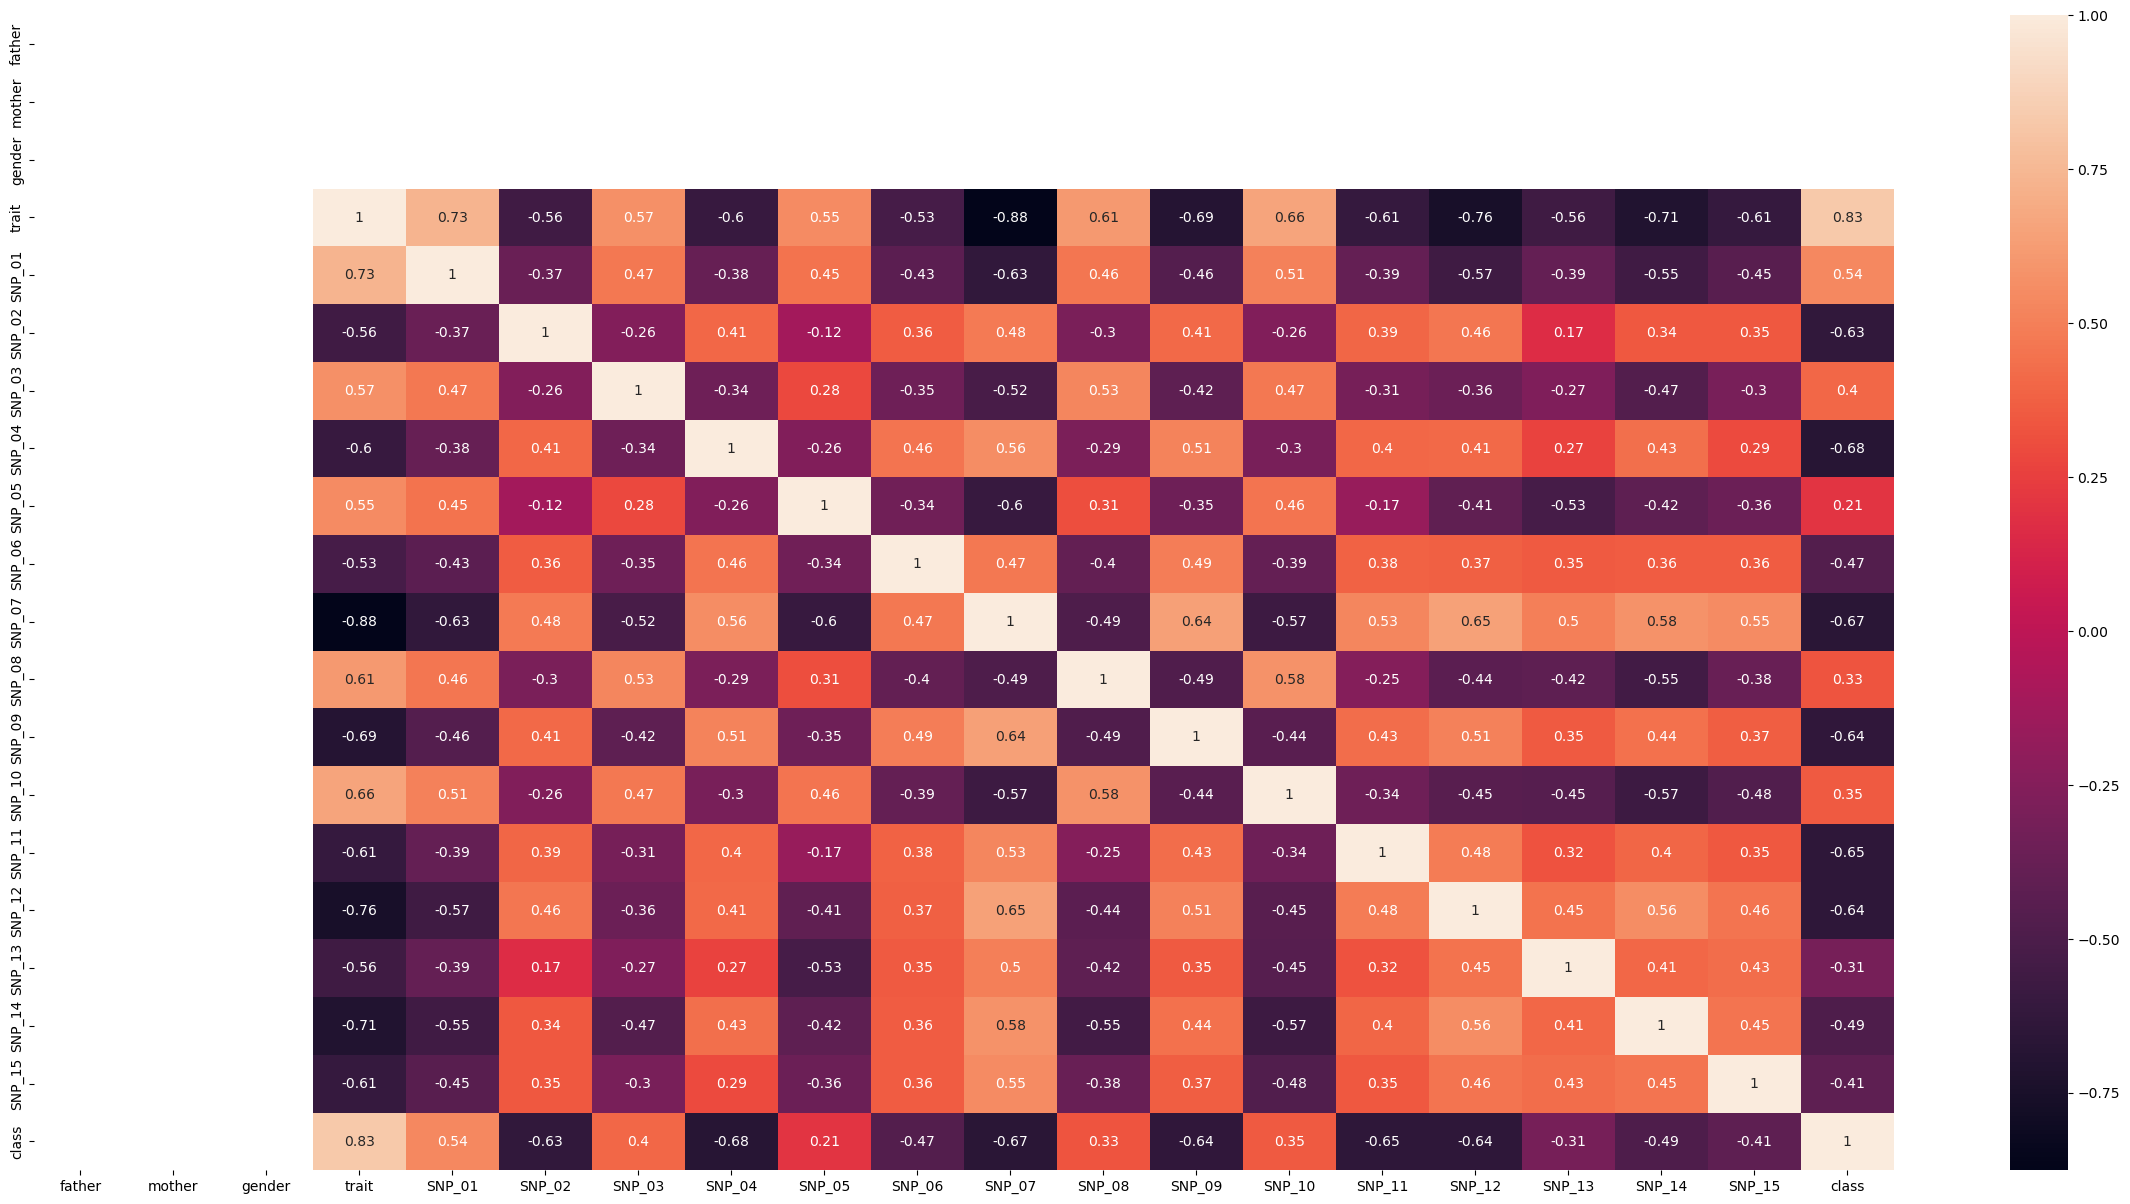

In [40]:
plt.figure(figsize=(30, 15)) 
sns.heatmap(train_data.corr(), annot=True)

In [30]:
X_train = train_data[features]
Y_train = train_data["class"]
x_test = test_data[features]

In [31]:
from sklearn.model_selection import train_test_split

# train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, random_state=22)

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rfmodel.fit(x_train, y_train)
rfmodel.score(x_valid, y_valid)

0.9622641509433962

In [43]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=200, learning_rate = 0.1)
evals = [(x_valid, y_valid)]
lgbm.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)
lgbm.score(x_valid, y_valid)

C:\Users\vpdlf910\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vpdlf910\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LightGBMError: Multiclass objective and metrics don't match

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
etree = ExtraTreesClassifier(n_estimators=100, max_depth=5, random_state=1)
etree.fit(x_train, y_train)
etree.score(x_valid, y_valid)

0.9622641509433962

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier()
gboost.fit(x_train, y_train)
gboost.score(x_valid, y_valid)

0.9245283018867925

In [38]:
predictions = rfmodel.predict(x_test)
predictions

array([0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 0, 1,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1])

In [72]:
predictions = np.where(predictions == 0,'A', np.where(predictions == 1 ,'B', np.where(predictions == 2, 'C',predictions)))

In [73]:
predictions

array(['A', 'B', 'C', 'B', 'A', 'B', 'C', 'B', 'A', 'A', 'C', 'B', 'B',
       'A', 'B', 'B', 'A', 'B', 'B', 'C', 'B', 'B', 'B', 'A', 'B', 'B',
       'B', 'A', 'A', 'B', 'A', 'A', 'B', 'C', 'A', 'C', 'C', 'B', 'B',
       'C', 'A', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'B', 'C', 'A', 'B',
       'A', 'B', 'B', 'B', 'C', 'A', 'B', 'C', 'C', 'B', 'C', 'C', 'C',
       'A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'C', 'B', 'C', 'B',
       'B', 'B', 'C', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'A', 'B',
       'B', 'C', 'B', 'B', 'C', 'A', 'B', 'A', 'C', 'A', 'B', 'B', 'C',
       'A', 'A', 'C', 'B', 'A', 'B', 'C', 'B', 'B', 'B', 'B', 'A', 'A',
       'C', 'B', 'B', 'A', 'B', 'B', 'C', 'C', 'B', 'C', 'B', 'A', 'B',
       'A', 'A', 'B', 'B', 'B', 'C', 'A', 'A', 'B', 'A', 'A', 'A', 'C',
       'B', 'B', 'B', 'A', 'B', 'C', 'A', 'A', 'B', 'A', 'B', 'B', 'A',
       'A', 'B', 'C', 'A', 'B', 'C', 'C', 'B', 'A', 'A', 'C', 'B', 'B',
       'A', 'B', 'C', 'C', 'B', 'B'], dtype='<U21')

In [74]:
submit = pd.read_csv("./open/sample_submission.csv")
submit

,id,class
0,TEST_000,A
1,TEST_001,A
2,TEST_002,A
3,TEST_003,A
4,TEST_004,A
...,...,...
170,TEST_170,A
171,TEST_171,A
172,TEST_172,A
173,TEST_173,A


In [75]:
submit['class'] = predictions
submit

,id,class
0,TEST_000,A
1,TEST_001,B
2,TEST_002,C
3,TEST_003,B
4,TEST_004,A
...,...,...
170,TEST_170,B
171,TEST_171,C
172,TEST_172,C
173,TEST_173,B


In [76]:
submit.to_csv('submission1.csv', index=False)